In [ ]:
from google.colab import files
from tqdm import tqdm
import gc
import gcsfs
import os
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from dask.diagnostics import ProgressBar
import numpy as np
import itertools
import calendar
import random

In [ ]:
# adding a progress bar for every code run using dask
ProgressBar().register()

In [ ]:
# Using dask to create a lazy df
df_feb_apr_19 = dd.read_parquet("/content/feb_apr_2019_export/*.parquet")
df_feb_apr_20 = dd.read_parquet("/content/feb_apr_2020_export/*.parquet")

In [ ]:
# checking the df's
df_feb_apr_19.head()

[########################################] | 100% Completed | 304.37 ms


,id,type,created_at,actor,repo,payload
0,9467373391,IssuesEvent,2019-04-18 08:08:45,kuntalacharyya,01org/isa-l,"{""action"":""closed"",""issue"":{""url"":""https://api..."
1,9163166325,IssuesEvent,2019-03-01 15:16:55,GUI,18F/api.data.gov,"{""action"":""closed"",""issue"":{""url"":""https://api..."
2,9513437118,IssuesEvent,2019-04-25 20:41:28,fureigh,18F/federal-grant-reporting,"{""action"":""closed"",""issue"":{""url"":""https://api..."
3,9425887876,IssuesEvent,2019-04-11 17:10:01,soyeb-jim285,3b1b/manim,"{""action"":""closed"",""issue"":{""url"":""https://api..."
4,9025313667,IssuesEvent,2019-02-07 13:07:32,ciarmcom,ARMmbed/mbed-os-5-docs,"{""action"":""closed"",""issue"":{""url"":""https://api..."


In [ ]:
df_feb_apr_20.head()

[########################################] | 100% Completed | 403.82 ms
[########################################] | 100% Completed | 504.26 ms


,id,type,created_at,actor,repo,payload
0,12088780983,IssuesEvent,2020-04-18 20:25:51,Dbzman,AOEpeople/gitlab-crucible-bridge,"{""action"":""closed"",""issue"":{""url"":""https://api..."
1,11502079848,IssuesEvent,2020-02-12 18:24:23,MikeRalphson,APIs-guru/openapi-directory,"{""action"":""closed"",""issue"":{""url"":""https://api..."
2,11692935302,IssuesEvent,2020-03-05 23:49:06,hol353,APSIMInitiative/ApsimX,"{""action"":""closed"",""issue"":{""url"":""https://api..."
3,11997965293,IssuesEvent,2020-04-08 19:32:53,IvoPaunov,AdExNetwork/adex-platform,"{""action"":""closed"",""issue"":{""url"":""https://api..."
4,11779449716,IssuesEvent,2020-03-16 18:02:47,Alex-302,AdguardTeam/AdguardFilters,"{""action"":""closed"",""issue"":{""url"":""https://api..."


In [ ]:
# counting the occurences of each event type in 2019
df_feb_apr_19['type'].value_counts().compute()

[########################################] | 100% Completed | 17.97 s


,count
type,
IssueCommentEvent,8481695
PushEvent,22321924
WatchEvent,11761098
ForkEvent,4103621
PullRequestEvent,6619006
PullRequestReviewCommentEvent,2775373
CreateEvent,4472888
GollumEvent,333846
IssuesEvent,3448847


In [ ]:
# counting the occurences of each event type in 2020
df_feb_apr_20['type'].value_counts().compute()

[########################################] | 100% Completed | 33.83 s


,count
type,
WatchEvent,11611722
ForkEvent,4722166
PullRequestEvent,14860562
PullRequestReviewCommentEvent,3903761
CreateEvent,10609250
GollumEvent,329948
MemberEvent,143513
IssueCommentEvent,11809479
PushEvent,29028704


In [ ]:
df_feb_apr_19.sort_values('created_at').head(10)

[########################################] | 100% Completed | 194.56 s


,id,type,created_at,actor,repo,payload
11634,8989466679,WatchEvent,2019-02-01,lieyanhonghu,jobbole/awesome-java-cn,"{""action"":""started""}"
24473,8989466640,PushEvent,2019-02-01,LombiqBot,Lombiq/Associativy-Core,"{""push_id"":3264484570,""size"":0,""distinct_size""..."
10736,8989466652,WatchEvent,2019-02-01,jayliu50,scottglz/distance-to-line-segment,"{""action"":""started""}"
12990,8989466633,CommitCommentEvent,2019-02-01,IOBYTE,danmar/cppcheck,"{""comment"":{""url"":""https://api.github.com/repo..."
14774,8989466650,PushEvent,2019-02-01,akr-andirect-org,ANDirect-org/data-dw,"{""push_id"":3264484577,""size"":1,""distinct_size""..."
23996,8989466674,PushEvent,2019-02-01,CMSQATeam,unitydemo2/CrossProjectLinks,"{""push_id"":3264484595,""size"":0,""distinct_size""..."
11868,8989466636,WatchEvent,2019-02-01,dnuffer,rowanz/swagaf,"{""action"":""started""}"
3057,8989466680,IssueCommentEvent,2019-02-01,ntilotta,Magog64/suru-plus,"{""action"":""created"",""issue"":{""url"":""https://ap..."
1782,8989466649,PullRequestReviewCommentEvent,2019-02-01,jessex,Recidiviz/recidiviz-data,"{""action"":""created"",""comment"":{""url"":""https://..."
14659,8989466655,PushEvent,2019-02-01,franck-paul,dotclear/dotclear,"{""push_id"":3264484581,""size"":0,""distinct_size""..."


In [ ]:
# making a copy of both 2019 and 2020 df's for analysis
collab_19 = df_feb_apr_19.copy()
collab_20 = df_feb_apr_20.copy()

In [ ]:
# dropping unneccesary columns for analysis
collab_19 = collab_19.drop('payload', axis = 1)
collab_20 = collab_20.drop('payload', axis = 1)

**Event Type analysis**

Analyzing general trends in developer activity by examining the frequency of key GiHub event types over time. This includes events like PushEvent, PullRequestEvent and IssueCommentEvent which represent core forms of collaboration such as code contributions, code review and discussion. By tracking how these events vary week by week from Febuary to April in 2019 and 2020, we aim to understand how developer engagement changed during the early COVID period. This analysis supports Research question 1 of the project - "How did developer collaboration activity on GitHub change during the COVID-19 pandemic compared to months before it?" by providing quantitative insights into shifts.

In [ ]:
# changing the created_at column to datetime format
collab_19['created_at'] = dd.to_datetime(collab_19['created_at'])
collab_20['created_at'] = dd.to_datetime(collab_20['created_at'])

In [ ]:
# adding a week column with the start date of the week for grouping
collab_19['week'] = collab_19['created_at'].dt.to_period('W').dt.start_time
collab_20['week'] = collab_20['created_at'].dt.to_period('W').dt.start_time

In [ ]:
# grouping by week and type of events to count events for each event type per week
event_counts_19 = collab_19.groupby(['week', 'type']).size().compute().reset_index(name='counts')
event_counts_20 = collab_20.groupby(['week', 'type']).size().compute().reset_index(name='counts')

[########################################] | 100% Completed | 52.36 s
[########################################] | 100% Completed | 106.11 s


In [ ]:
# normalizing the event counts each week to cover for partial weeks
# creating a new column with the date of the event
collab_19['event_date'] = collab_19['created_at'].dt.date
collab_20['event_date'] = collab_20['created_at'].dt.date

# grouping by to get a count of unique dates per week
days_per_week_19 = collab_19.groupby('week')['event_date'].nunique().compute()
days_per_week_20 = collab_20.groupby('week')['event_date'].nunique().compute()

# mapping day counts to df's as week_days
event_counts_19['week_days'] = event_counts_19['week'].map(days_per_week_19)
event_counts_20['week_days'] = event_counts_20['week'].map(days_per_week_20)

# adding a new column normalized counts to get a normalized count of event types per week
event_counts_19['normalized_counts'] = (event_counts_19['counts'] / event_counts_19['week_days']) * 7
event_counts_20['normalized_counts'] = (event_counts_20['counts'] / event_counts_20['week_days']) * 7

[########################################] | 100% Completed | 47.64 s
[########################################] | 100% Completed | 87.08 s


In [ ]:
gc.collect()

4118

In [ ]:
# adding a year label
event_counts_19['label'] = '2019'
event_counts_20['label'] = '2020'

In [ ]:
# combining the 2019 and 2020 event counts
weekly_counts = pd.concat([event_counts_19, event_counts_20])

In [ ]:
weekly_counts.sort_values('week')

,week,type,counts,week_days,normalized_counts,label
125,2019-01-28,WatchEvent,229480,3,5.354533e+05,2019
124,2019-01-28,ReleaseEvent,4926,3,1.149400e+04,2019
163,2019-01-28,PullRequestEvent,126082,3,2.941913e+05,2019
91,2019-01-28,DeleteEvent,33622,3,7.845133e+04,2019
11,2019-01-28,MemberEvent,2413,3,5.630333e+03,2019
...,...,...,...,...,...,...
158,2020-04-27,IssueCommentEvent,714948,4,1.251159e+06,2020
187,2020-04-27,WatchEvent,616532,4,1.078931e+06,2020
99,2020-04-27,DeleteEvent,241994,4,4.234895e+05,2020
154,2020-04-27,ReleaseEvent,24782,4,4.336850e+04,2020


In [ ]:
# function to generate week labels from datetime
def week_label(date):
  month = calendar.month_abbr[date.month]
  week_number = ((date.day - 1) // 7) + 1
  suffix = {1: '1st', 2: '2nd', 3: '3rd'}.get(week_number, f'{week_number}th')
  return f'{month}_{suffix}_week'

In [ ]:
# getting week labels for event counts data
event_counts_19['week_label'] = event_counts_19['week'].apply(week_label)
event_counts_20['week_label'] = event_counts_20['week'].apply(week_label)

In [ ]:
# verifying the week labels
event_counts_19.sort_values('week')

,week,type,counts,week_days,normalized_counts,label,week_label
64,2019-01-28,GollumEvent,9668,3,2.255867e+04,2019,Jan_4th_week
125,2019-01-28,WatchEvent,229480,3,5.354533e+05,2019,Jan_4th_week
124,2019-01-28,ReleaseEvent,4926,3,1.149400e+04,2019,Jan_4th_week
139,2019-01-28,IssueCommentEvent,168070,3,3.921633e+05,2019,Jan_4th_week
11,2019-01-28,MemberEvent,2413,3,5.630333e+03,2019,Jan_4th_week
...,...,...,...,...,...,...,...
32,2019-04-29,PullRequestReviewCommentEvent,78777,2,2.757195e+05,2019,Apr_5th_week
21,2019-04-29,CommitCommentEvent,4649,2,1.627150e+04,2019,Apr_5th_week
14,2019-04-29,WatchEvent,295336,2,1.033676e+06,2019,Apr_5th_week
121,2019-04-29,ForkEvent,105885,2,3.705975e+05,2019,Apr_5th_week


In [ ]:
# creating weekly pivot tables with event types as columns and normalized counts as values
pivot_2019 = event_counts_19.pivot_table(
    index = ['week', 'week_label'],
    columns = 'type',
    values = 'normalized_counts'
).sort_values('week').reset_index()

pivot_2020 = event_counts_20.pivot_table(
    index = ['week', 'week_label'],
    columns = 'type',
    values = 'normalized_counts'
).sort_values('week').reset_index()

In [ ]:
pivot_2019

type,week,week_label,CommitCommentEvent,CreateEvent,DeleteEvent,ForkEvent,GollumEvent,IssueCommentEvent,IssuesEvent,MemberEvent,PublicEvent,PullRequestEvent,PullRequestReviewCommentEvent,PushEvent,ReleaseEvent,WatchEvent
0,2019-01-28,Jan_4th_week,8654.333333,181533.333333,78451.333333,185425.333333,22558.666667,392163.333333,166618.666667,5630.333333,16.333333,294191.333333,110931.333333,1.145314e+06,11494.0,5.354533e+05
1,2019-02-04,Feb_1st_week,12444.000000,308282.000000,145104.000000,222698.000000,26762.000000,599118.000000,240941.000000,10022.000000,18.000000,459303.000000,195151.000000,1.566666e+06,17755.0,6.072930e+05
2,2019-02-11,Feb_2nd_week,13602.000000,357496.000000,200770.000000,290893.000000,34338.000000,697611.000000,273167.000000,10480.000000,19.000000,510170.000000,227078.000000,1.691404e+06,18995.0,8.593970e+05
3,2019-02-18,Feb_3rd_week,13554.000000,358359.000000,168658.000000,324114.000000,28223.000000,687391.000000,284016.000000,10635.000000,16.000000,526903.000000,220527.000000,1.729327e+06,19912.0,9.051970e+05
4,2019-02-25,Feb_4th_week,13525.000000,375301.000000,176694.000000,331578.000000,26825.000000,706922.000000,290664.000000,11114.000000,14.000000,538825.000000,231135.000000,1.802644e+06,21244.0,9.292680e+05
5,2019-03-04,Mar_1st_week,13967.000000,350472.000000,169837.000000,325092.000000,27728.000000,699814.000000,279558.000000,9759.000000,22.000000,532325.000000,226391.000000,1.771853e+06,20336.0,9.396330e+05
6,2019-03-11,Mar_2nd_week,13853.000000,355490.000000,161060.000000,327166.000000,28487.000000,678947.000000,278395.000000,11074.000000,15.000000,528881.000000,222245.000000,1.776363e+06,20301.0,9.115800e+05
7,2019-03-18,Mar_3rd_week,13367.000000,356167.000000,173491.000000,335035.000000,24210.000000,679649.000000,274765.000000,11004.000000,25.000000,547065.000000,222011.000000,1.876761e+06,19628.0,9.213490e+05
8,2019-03-25,Mar_4th_week,13106.000000,394644.000000,207857.000000,340641.000000,24880.000000,726760.000000,306244.000000,11020.000000,17.000000,547396.000000,231332.000000,1.820475e+06,21441.0,1.131942e+06
9,2019-04-01,Apr_1st_week,13827.000000,377884.000000,181901.000000,333357.000000,24879.000000,678166.000000,276126.000000,11015.000000,18.000000,558781.000000,228671.000000,1.852563e+06,20686.0,9.683360e+05


In [ ]:
pivot_2020

type,week,week_label,CommitCommentEvent,CreateEvent,DeleteEvent,ForkEvent,GollumEvent,IssueCommentEvent,IssuesEvent,MemberEvent,PublicEvent,PullRequestEvent,PullRequestReviewCommentEvent,PushEvent,ReleaseEvent,WatchEvent
0,2020-01-27,Jan_4th_week,15774.50,398069.00,144851.0,228872.0,18889.50,403280.5,157650.5,5127.50,NaN,480158.00,98483.00,1553548.50,14399.0,586778.5
1,2020-02-03,Feb_1st_week,24456.00,547411.00,239817.0,312619.0,27300.00,765896.0,287563.0,11876.00,4.00,829493.00,266682.00,1955850.00,28867.0,759812.0
2,2020-02-10,Feb_2nd_week,25242.00,635501.00,281757.0,325974.0,22971.00,818542.0,296634.0,10532.00,1.00,929529.00,273258.00,2000450.00,30734.0,849291.0
3,2020-02-17,Feb_3rd_week,23404.00,580814.00,249272.0,339399.0,22113.00,782725.0,295696.0,10634.00,1.00,826883.00,264564.00,1986392.00,29495.0,847033.0
4,2020-02-24,Feb_4th_week,23949.00,969167.00,406014.0,345896.0,23934.00,945486.0,308765.0,10524.00,NaN,1358734.00,272717.00,2041215.00,30746.0,855540.0
5,2020-03-02,Mar_1st_week,23287.00,761211.00,410300.0,359902.0,25277.00,954020.0,299922.0,12077.00,NaN,1180378.00,284623.00,2126306.00,30895.0,874191.0
6,2020-03-09,Mar_2nd_week,24565.00,1161152.00,294864.0,358424.0,21005.00,851271.0,314685.0,10292.00,NaN,1444793.00,287667.00,2130474.00,29842.0,858583.0
7,2020-03-16,Mar_3rd_week,28544.00,800229.00,302125.0,356847.0,22757.00,854543.0,308029.0,13260.00,2.00,1068162.00,308615.00,2195513.00,34081.0,866162.0
8,2020-03-23,Mar_4th_week,32865.00,714782.00,349339.0,379115.0,27172.00,963958.0,344800.0,13170.00,1.00,1069998.00,331725.00,2368464.00,41028.0,919947.0
9,2020-03-30,Mar_5th_week,40713.00,1351275.00,367013.0,391325.0,27233.00,1026668.0,360250.0,12641.00,3.00,1708871.00,346111.00,2447380.00,38062.0,951164.0


In [ ]:
# saving the tables
pivot_2019.to_csv('normalized_event_counts_2019.csv', index = False)
pivot_2020.to_csv('normalized_event_counts_2020.csv', index = False)

In [ ]:
# droping week column and setting week label as index
pivot_2019 = pivot_2019.drop(columns = 'week').set_index('week_label')
pivot_2020 = pivot_2020.drop(columns = 'week').set_index('week_label')

Excluding data from January 4th week as it was a partial week and showed abnormally low event counts even after normalizing the data, which is significantly skewing the percentage change calculations. Removing the outlier to ensure accurate and consistent comparision of weekly collaboration trends between 2019 and 2020.

In [ ]:
# removing the Jan 4th partial week, as it is skewing the trend analysis
pivot_2019 = pivot_2019.iloc[1:].copy()
pivot_2020 = pivot_2020.iloc[1:].copy()

In [ ]:
# calculating weekly percentage change for each event type
pct_change_2019 = pivot_2019.pct_change().multiply(100).round(2).add_suffix('_2019')
pct_change_2020 = pivot_2020.pct_change().multiply(100).round(2).add_suffix('_2020')

In [ ]:
# dropping the 1st row as is has NaN values
pct_change_2019 = pct_change_2019.iloc[1:].copy()
pct_change_2020 = pct_change_2020.iloc[1:].copy()

In [ ]:
pct_change_2019

type,CommitCommentEvent_2019,CreateEvent_2019,DeleteEvent_2019,ForkEvent_2019,GollumEvent_2019,IssueCommentEvent_2019,IssuesEvent_2019,MemberEvent_2019,PublicEvent_2019,PullRequestEvent_2019,PullRequestReviewCommentEvent_2019,PushEvent_2019,ReleaseEvent_2019,WatchEvent_2019
week_label,,,,,,,,,,,,,,
Feb_2nd_week,9.31,15.96,38.36,30.62,28.31,16.44,13.38,4.57,5.56,11.07,16.36,7.96,6.98,41.51
Feb_3rd_week,-0.35,0.24,-15.99,11.42,-17.81,-1.46,3.97,1.48,-15.79,3.28,-2.88,2.24,4.83,5.33
Feb_4th_week,-0.21,4.73,4.76,2.30,-4.95,2.84,2.34,4.50,-12.50,2.26,4.81,4.24,6.69,2.66
Mar_1st_week,3.27,-6.62,-3.88,-1.96,3.37,-1.01,-3.82,-12.19,57.14,-1.21,-2.05,-1.71,-4.27,1.12
Mar_2nd_week,-0.82,1.43,-5.17,0.64,2.74,-2.98,-0.42,13.47,-31.82,-0.65,-1.83,0.25,-0.17,-2.99
Mar_3rd_week,-3.51,0.19,7.72,2.41,-15.01,0.10,-1.30,-0.63,66.67,3.44,-0.11,5.65,-3.32,1.07
Mar_4th_week,-1.95,10.80,19.81,1.67,2.77,6.93,11.46,0.15,-32.00,0.06,4.20,-3.00,9.24,22.86
Apr_1st_week,5.50,-4.25,-12.49,-2.14,-0.00,-6.69,-9.83,-0.05,5.88,2.08,-1.15,1.76,-3.52,-14.45
Apr_2nd_week,71.58,-3.55,-5.34,3.12,-1.91,0.01,-1.21,-8.60,33.33,-3.99,-0.73,-1.95,-5.62,5.04


The table shows the week over week percentage change in normalized GitHub event counts for 2019. These changes help identify fluctuations in developer activity and engagement with different types of GitHub events throughout Febuary to April 2019.
  - In Febuary 2nd week, nearly all events saw a sharp increase, like for example, the DeleteEvent jumped by 38.36%, ForkEvent by 30.62% and WatchEvent by 41.51%, which shows a surge in developer collaboration.
  - The largest spike across all weeks is seen in April 2nd week for CommitCommentEvent which saw a 71.58% increase, which reflects increased collaboration or code review acitivity.
  - Whereas, there was dip in DeleteEvent by 15.9% in Feb 3rd week and In April 3rd week many events show consistent dip, for example CommitCommentEvent dropped by 41.2%, IssuesEvent dropped by 7%, which can be possible due to post April surge.
  - Large fluctuations can be seen in some events like PublicEvebt with a large increase of 57% in March 1st week, followed by a 31% drop two weeks later and again a 33% increase in April 2nd week.
Overall, 2019 shows dynamic collaboration patterns with alternating growth and dips across different event types. Febuary and April 2nd weeks shows a sharp increase, meanwhile there is a slowdown in April 3rd week in most of the events.

In [ ]:
pct_change_2020

type,CommitCommentEvent_2020,CreateEvent_2020,DeleteEvent_2020,ForkEvent_2020,GollumEvent_2020,IssueCommentEvent_2020,IssuesEvent_2020,MemberEvent_2020,PublicEvent_2020,PullRequestEvent_2020,PullRequestReviewCommentEvent_2020,PushEvent_2020,ReleaseEvent_2020,WatchEvent_2020
week_label,,,,,,,,,,,,,,
Feb_2nd_week,3.21,16.09,17.49,4.27,-15.86,6.87,3.15,-11.32,-75.00,12.06,2.47,2.28,6.47,11.78
Feb_3rd_week,-7.28,-8.61,-11.53,4.12,-3.74,-4.38,-0.32,0.97,0.00,-11.04,-3.18,-0.70,-4.03,-0.27
Feb_4th_week,2.33,66.86,62.88,1.91,8.23,20.79,4.42,-1.03,0.00,64.32,3.08,2.76,4.24,1.00
Mar_1st_week,-2.76,-21.46,1.06,4.05,5.61,0.90,-2.86,14.76,0.00,-13.13,4.37,4.17,0.48,2.18
Mar_2nd_week,5.49,52.54,-28.13,-0.41,-16.90,-10.77,4.92,-14.78,0.00,22.40,1.07,0.20,-3.41,-1.79
Mar_3rd_week,16.20,-31.08,2.46,-0.44,8.34,0.38,-2.12,28.84,100.00,-26.07,7.28,3.05,14.20,0.88
Mar_4th_week,15.14,-10.68,15.63,6.24,19.40,12.80,11.94,-0.68,-50.00,0.17,7.49,7.88,20.38,6.21
Mar_5th_week,23.88,89.05,5.06,3.22,0.22,6.51,4.48,-4.02,200.00,59.71,4.34,3.33,-7.23,3.39
Apr_1st_week,-8.39,-45.72,-12.32,1.77,-0.85,-6.34,-0.62,-10.82,-33.33,-38.39,-5.52,1.63,-2.73,2.88


This table shows the week over week percentage change in normalized GitHub event counts for 2020.
  - It can see that, there is a surge in most event types during Feb 4th week, for events like CreateEvent which rose by 66%, DeleteEvent by 62% and PullRequestEvent by 64%, which shows a increase in new development activity.
  - And during March 5th week, the event counts increased by a huge amount, like CreateEvent rose by 89%, PullRequestEvent by 59% and PublicEvent by 200%, possibly due to last minute collaboration pushes before global lockdown.
  - And after that, there is decline across most event types in the April 1st week, with events like CreateEvent dropped by 45.7%, PullRequestEvent by 39.39% and CommitCommentEvent by 8.3%, possibly reflecting the initial shock of the pandemic disrupting the developer workflows.
  - A similar pattern can be seen in Feb 3rd week, with multiple events like CreateEvet and DeleteEvent which dropped by 8.6% and 11.5% respectively.
  
Overall, 2020 saw higher volatility in event growth rates compared to 2019. Weeks like Feb 4th and March 5th weeks saw major spikes across several event types, likely due to pre lockdown development surges. Howevern beginning from April there is a decline in collaboration activity, which aligns with the global transition to remote work.

Averaging the late weeks in March 2019, to match the week labels in 2020.

In [ ]:
# averaging 2 weeks event pct change counts in march 2019
# selecting the rows to average
rows_to_avg = pct_change_2020.loc[['Mar_4th_week', 'Mar_5th_week']]

# averaging the weeks
avg_row = rows_to_avg.mean().to_frame().T
# setting index name
avg_row.index = ['Mar_4th_week']

# dropping the original weeks values and adding the new averaged week values
pct_change_2020_trimmed = pct_change_2020.drop(index = ['Mar_4th_week', 'Mar_5th_week'])

# adding the averaged row back
pct_change_2020 = pd.concat([pct_change_2020_trimmed, avg_row]).sort_index()

# joining 2019 and updated 2020 data
weekly_event_pct_change = pct_change_2019.join(pct_change_2020, how ='inner')

In [ ]:
# saving the weekly event count percent changes to a csv file
weekly_event_pct_change.to_csv('weekly_event_pct_changes.csv')

In [ ]:
weekly_event_pct_change

type,CommitCommentEvent_2019,CreateEvent_2019,DeleteEvent_2019,ForkEvent_2019,GollumEvent_2019,IssueCommentEvent_2019,IssuesEvent_2019,MemberEvent_2019,PublicEvent_2019,PullRequestEvent_2019,...,GollumEvent_2020,IssueCommentEvent_2020,IssuesEvent_2020,MemberEvent_2020,PublicEvent_2020,PullRequestEvent_2020,PullRequestReviewCommentEvent_2020,PushEvent_2020,ReleaseEvent_2020,WatchEvent_2020
Feb_2nd_week,9.31,15.96,38.36,30.62,28.31,16.44,13.38,4.57,5.56,11.07,...,-15.86,6.870,3.15,-11.32,-75.00,12.06,2.470,2.280,6.470,11.78
Feb_3rd_week,-0.35,0.24,-15.99,11.42,-17.81,-1.46,3.97,1.48,-15.79,3.28,...,-3.74,-4.380,-0.32,0.97,0.00,-11.04,-3.180,-0.700,-4.030,-0.27
Feb_4th_week,-0.21,4.73,4.76,2.30,-4.95,2.84,2.34,4.50,-12.50,2.26,...,8.23,20.790,4.42,-1.03,0.00,64.32,3.080,2.760,4.240,1.00
Mar_1st_week,3.27,-6.62,-3.88,-1.96,3.37,-1.01,-3.82,-12.19,57.14,-1.21,...,5.61,0.900,-2.86,14.76,0.00,-13.13,4.370,4.170,0.480,2.18
Mar_2nd_week,-0.82,1.43,-5.17,0.64,2.74,-2.98,-0.42,13.47,-31.82,-0.65,...,-16.90,-10.770,4.92,-14.78,0.00,22.40,1.070,0.200,-3.410,-1.79
Mar_3rd_week,-3.51,0.19,7.72,2.41,-15.01,0.10,-1.30,-0.63,66.67,3.44,...,8.34,0.380,-2.12,28.84,100.00,-26.07,7.280,3.050,14.200,0.88
Mar_4th_week,-1.95,10.80,19.81,1.67,2.77,6.93,11.46,0.15,-32.00,0.06,...,9.81,9.655,8.21,-2.35,75.00,29.94,5.915,5.605,6.575,4.80
Apr_1st_week,5.50,-4.25,-12.49,-2.14,-0.00,-6.69,-9.83,-0.05,5.88,2.08,...,-0.85,-6.340,-0.62,-10.82,-33.33,-38.39,-5.520,1.630,-2.730,2.88
Apr_2nd_week,71.58,-3.55,-5.34,3.12,-1.91,0.01,-1.21,-8.60,33.33,-3.99,...,20.34,3.270,6.81,-7.87,0.00,11.24,1.300,3.010,3.570,5.79
Apr_3rd_week,-41.24,-7.89,-4.49,-7.39,-10.94,-8.79,-7.22,-12.79,-29.17,-6.11,...,-13.34,6.890,1.10,-11.42,200.00,-7.06,2.600,0.290,4.480,-0.30


In 2019, the data shows relatively stable week to week changes, with most event types fluctuating moderately. For example, PushEvent and IssueCommentEvent typically changed by positve or negative 2-5%, which shows consistent collaboration patterns.
But in contrast, 2020 shows more volatility in several event types, particularly from mid Febuary through March. For example
  - PullRequestEvent jumps by 64% in 1 weel and the drops by more than 10% the next week.
  - IssueCommentEvent grows by 21% in 1 week and then falls by 11%.
  - PublicEvent sees a sharp drop of 75% right at the start of the observed period.  

This greater fluctuation in 2020 likely reflects the discruption and transition period when the COVID-19 pandemic began to impact developer workflows globally. As teams adjusted to remote work and global disruptions, collaboration patterns became less predictable.

In [ ]:
def plot_event_changes(event_name, df):
  col_2019 = f'{event_name}_2019'
  col_2020 = f'{event_name}_2020'

  data = df[[col_2019, col_2020]].dropna()

  plt.figure(figsize=(12, 6))
  plt.plot(data.index, data[col_2019], marker = 'o', label = '2019', linewidth = 2)
  plt.plot(data.index, data[col_2020], marker = 's', label = '2020', linewidth = 2)

  plt.title(f'weekly % change in {event_name} events 2019 vs 2020', fontsize = 14)
  plt.xlabel('week', fontsize = 12)
  plt.ylabel('% change', fontsize = 12)
  plt.xticks(rotation = 45)
  plt.grid(True, linestyle = '--', alpha = 0.5)
  plt.legend()
  plt.tight_layout()
  plt.show()

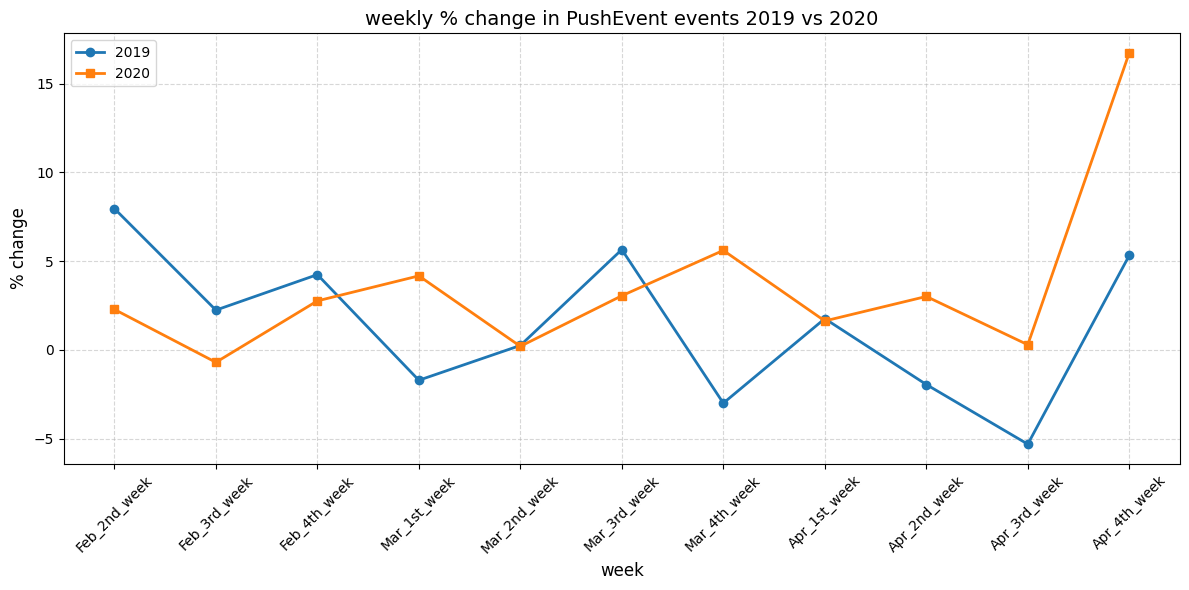

In [ ]:
plot_event_changes('PushEvent', weekly_event_pct_change)

When looking at Push event activity, 2019 shows steady week to week changes mostly in the range of positive and negative 5%, which shows stable development workflows. In contrast, 2020 shows larger variations, after a normal increse in Febuary around 4%, there is a sharp increase of 17% in the last week of April, which may reflect increased engagement during early pandemic lockdowns. This suggests that while workflows shifted during COVID, many developers stayed active and even increased their core contributions.

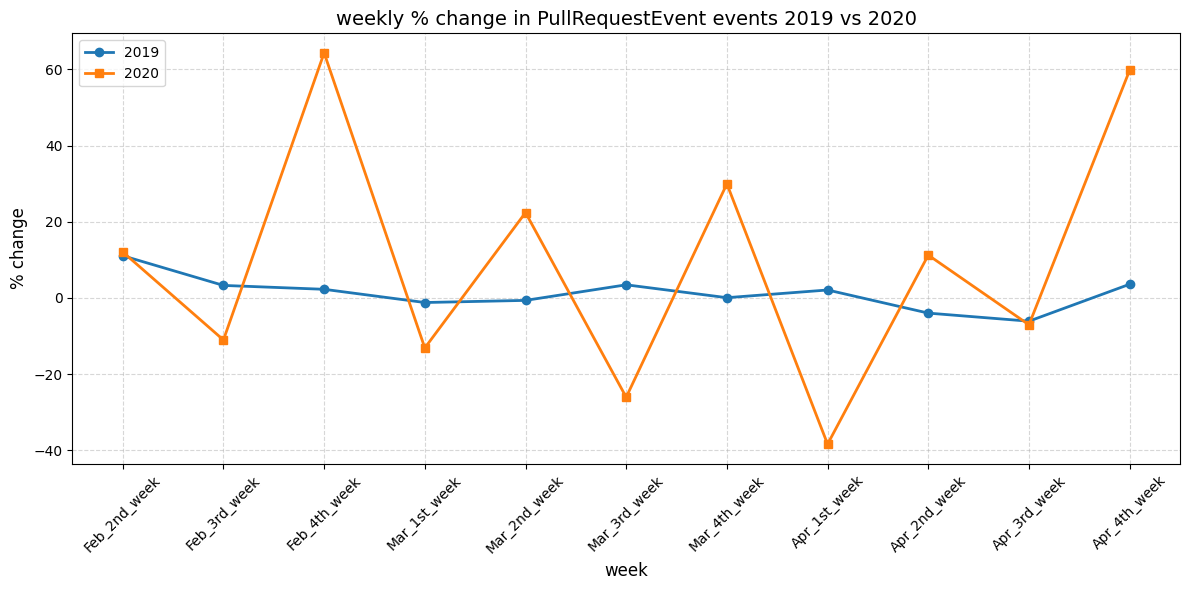

In [ ]:
plot_event_changes('PullRequestEvent', weekly_event_pct_change)

In 2019, pull request activity stayed mostly stable with week to week changes under positive and negative 5%. But in 2020, the pattern was much more erratic, a sharp 64% spike in late Febuary was followed by drops of 15% then another 30% rise and even a steep dip of 39% in early April. These bih swings suggest that during COVID, collaborative code review and merging became more unpredictable, possibly due to changing project timelines or team adjustments to remote workflows.

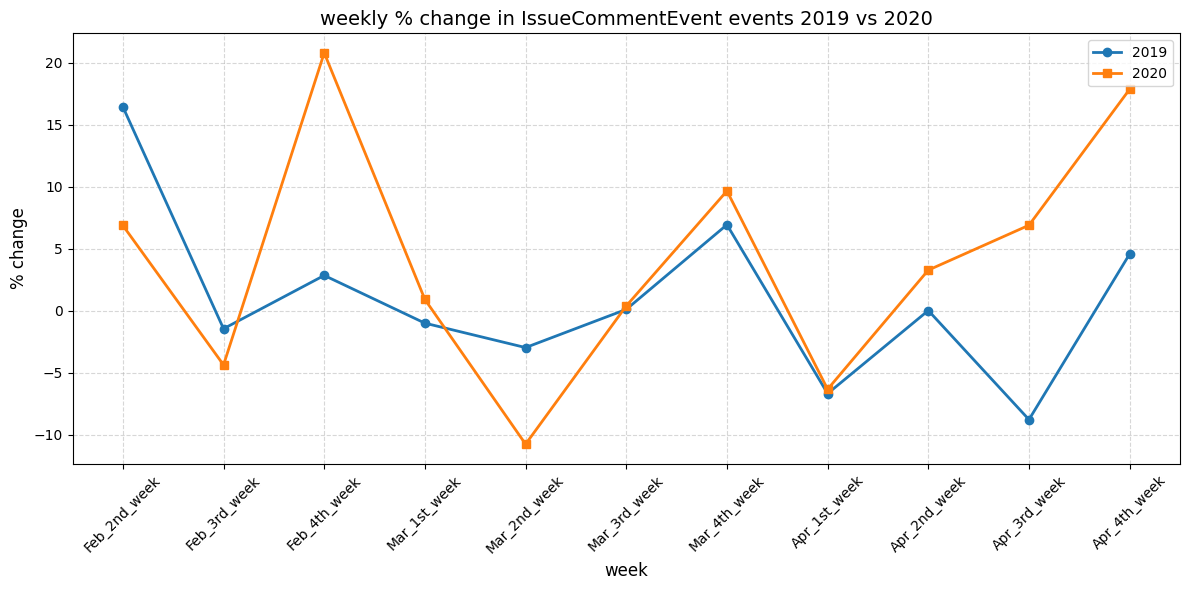

In [ ]:
plot_event_changes('IssueCommentEvent', weekly_event_pct_change)

In 2019, issue comment activity stayed mostly within +5% to -5%, showing steady discussion patterns. In 2020, the trend was more dynamic, with a 21% spike in late Febuary, a 11% drop in mid March and a steady rise again through April ending at 18%. This suggests that while developer discussions dipped briefly during the early COVID disruption, they quickly picked back up as teams adapted to remote workflows.

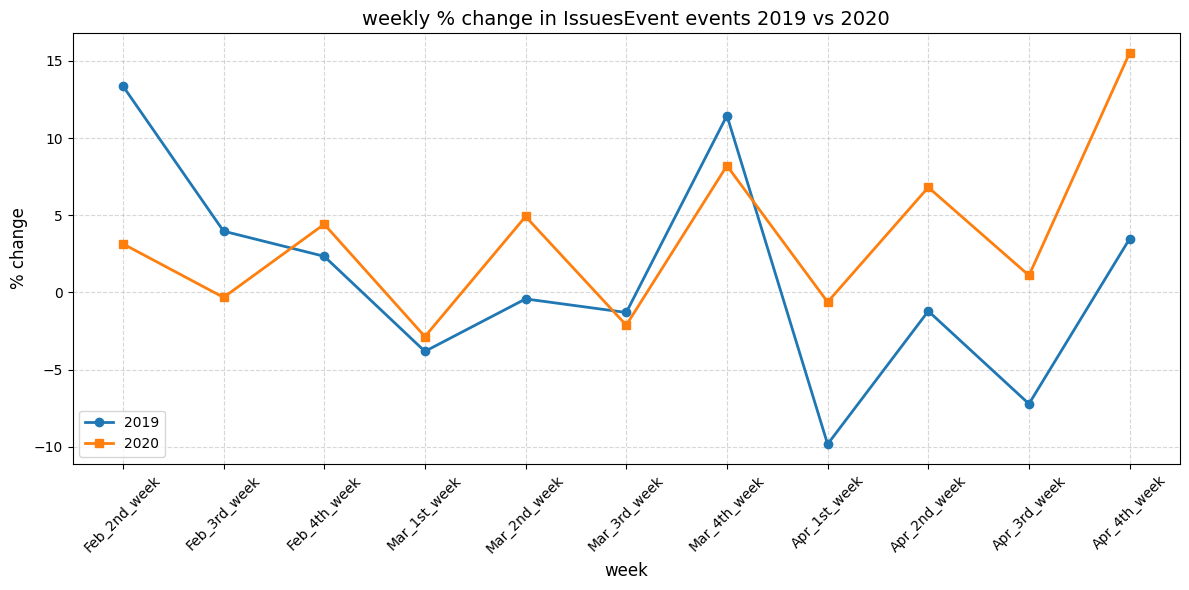

In [ ]:
plot_event_changes('IssuesEvent', weekly_event_pct_change)

In 2019, issue activity stayed mostly within +10 to -10%, with occassional spikes like a 13% spike in late March. In 2020, the changes were more balanced but showed steady growth through April, ending with a 15% increase in the final week. This suggests that while 2020 started off more cautiously, issue activity steadily picked up as teams adapted to remote collaboration.

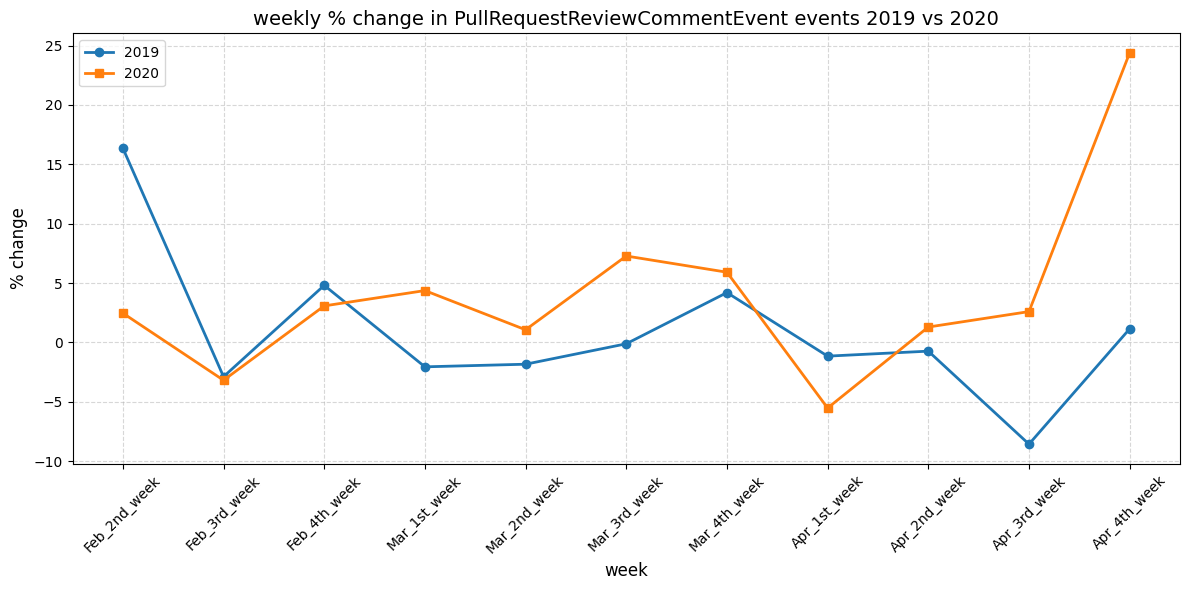

In [ ]:
plot_event_changes('PullRequestReviewCommentEvent', weekly_event_pct_change)

In 2019, review comment activity stayed mostly between -5% to +5%, showing stable collaboration through code review. In 2020, the trend was steadier early on but ended with a sharp 24% spike in the last week of April. This late surge suggests developers were engaging more in code reviews as they settled into remote workflows during the pandemic.

**Active Developers trends per week**

In addition to event activity, I also examined how the number of active developers changed week by week in 2019 and 2020. For this, I count the number of unique developers involved in GitHub events each week. This helps us understand participation trends and whether more individuals were engaging with projects during the early COVID-19 period. This analysis supports the Research question 1 by showing whether collaboration shifts were driven by changes in engagement levels or team sizes.

In [ ]:
# getting the count of active developer per week
devs_19 = collab_19.groupby('week')['actor'].nunique().compute().reset_index(name = 'active_devs')
devs_20 = collab_20.groupby('week')['actor'].nunique().compute().reset_index(name = 'active_devs')

[########################################] | 100% Completed | 56.06 s
[########################################] | 100% Completed | 105.63 s


In [ ]:
# getting week labels for both 2019 and 2020 active devs data
devs_19['week_label'] = devs_19['week'].apply(week_label)
devs_20['week_label'] = devs_20['week'].apply(week_label)

In [ ]:
devs_19.sort_values('week').head()

,week,active_devs,week_label
7,2019-01-28,288917,Jan_4th_week
11,2019-02-04,592843,Feb_1st_week
10,2019-02-11,724964,Feb_2nd_week
12,2019-02-18,762170,Feb_3rd_week
5,2019-02-25,781795,Feb_4th_week


In [ ]:
devs_20.sort_values('week').head()

,week,active_devs,week_label
0,2020-01-27,215116,Jan_4th_week
7,2020-02-03,754470,Feb_1st_week
11,2020-02-10,780056,Feb_2nd_week
8,2020-02-17,803582,Feb_3rd_week
13,2020-02-24,817007,Feb_4th_week


Dropping January 4th weeks data in both years and April 5th week in 2020, as it is a partial week with very little data, which is skewing the analysis and giving abnormal results.

In [ ]:
# removing Jan 4th week in both years and Apr 5th week in 2019
devs_19 = devs_19[~devs_19['week_label'].isin(['Jan_4th_week', 'Apr_5th_week'])]
devs_20 = devs_20[devs_20['week_label'] != 'Jan_4th_week']

Normalizing the partial week of April 4th week in 2020 as this week has a little more days to not skew analysis much.

In [ ]:
# normalizing the event counts each week to cover for partial weeks
# creating a new column with the date of the event
collab_19['event_date'] = collab_19['created_at'].dt.date
collab_20['event_date'] = collab_20['created_at'].dt.date

# grouping by to get a count of unique dates per week
days_per_week_20 = collab_20.groupby('week')['event_date'].nunique().compute()

# mapping day counts to df's as week_days
devs_20['week_days'] = devs_20['week'].map(days_per_week_20)

# adding a new column normalized counts to get a normalized count of event types per week
devs_20['active_devs'] = (devs_20['active_devs'] / devs_20['week_days']) * 7

[########################################] | 100% Completed | 74.60 s


In [ ]:
# selecting the weeks to average
rows_to_avg = devs_19[devs_19['week_label'].isin(['Mar_4th_week', 'Mar_5th_week'])]

# computing the average row
avg_row = rows_to_avg.copy().iloc[0:1]
avg_row['active_devs'] = rows_to_avg['active_devs'].mean()
avg_row['week_label'] = 'Mar_4th_week'
avg_row['week'] = rows_to_avg['week'].min()

# dropping the original rows and inserting the averaged row
devs_19 = devs_19[~devs_19['week_label'].isin(['Mar_4th_week', 'Mar_5th_week'])]
devs_19 = pd.concat([devs_19, avg_row], ignore_index=True).sort_values('week').reset_index(drop=True)

In [ ]:
devs_20 = devs_20.drop(columns = 'week_days')

In [ ]:
devs_20.sort_values('week').head()

,week,active_devs,week_label
7,2020-02-03,754470.0,Feb_1st_week
11,2020-02-10,780056.0,Feb_2nd_week
8,2020-02-17,803582.0,Feb_3rd_week
13,2020-02-24,817007.0,Feb_4th_week
6,2020-03-02,839663.0,Mar_1st_week


In [ ]:
devs_19.sort_values('week').head()

,week,active_devs,week_label
0,2019-02-04,592843.0,Feb_1st_week
1,2019-02-11,724964.0,Feb_2nd_week
2,2019-02-18,762170.0,Feb_3rd_week
3,2019-02-25,781795.0,Feb_4th_week
4,2019-03-04,785789.0,Mar_1st_week


In [ ]:
# sorting the values by week and restting the index
devs_19 = devs_19.sort_values('week').reset_index(drop = True)
devs_20 = devs_20.sort_values('week').reset_index(drop = True)

In [ ]:
# saving the unique devs per week counts df to csv file
devs_19.to_csv('devs_19.csv')
devs_20.to_csv('devs_20.csv')

In [ ]:
# droping week column and setting week_label as index
devs_19 = devs_19.drop(columns='week').set_index('week_label')
devs_20 = devs_20.drop(columns='week').set_index('week_label')

In [ ]:
# calculating week over week percent changes
pct_change_devs_19 = devs_19.pct_change().multiply(100).round(2).add_suffix('_2019')
pct_change_devs_20 = devs_20.pct_change().multiply(100).round(2).add_suffix('_2020')

# renaming columns
pct_change_devs_19 = pct_change_devs_19.rename(columns={'active_2019': 'pct_change_2019'})
pct_change_devs_20 = pct_change_devs_20.rename(columns={'active_2020': 'pct_change_2020'})

In [ ]:
# droping the 1st row which has NaN values
pct_change_devs_19 = pct_change_devs_19.iloc[1:].copy()
pct_change_devs_20 = pct_change_devs_20.iloc[1:].copy()

In [ ]:
pct_change_devs_20

,active_devs_2020
week_label,
Feb_2nd_week,3.39
Feb_3rd_week,3.02
Feb_4th_week,1.67
Mar_1st_week,2.77
Mar_2nd_week,-1.29
Mar_3rd_week,-0.29
Mar_4th_week,6.42
Mar_5th_week,3.31
Apr_1st_week,0.79


In [ ]:
pct_change_devs_19

,active_devs_2019
week_label,
Feb_2nd_week,22.29
Feb_3rd_week,5.13
Feb_4th_week,2.57
Mar_1st_week,0.51
Mar_2nd_week,-0.16
Mar_3rd_week,1.08
Mar_4th_week,12.89
Apr_1st_week,-6.24
Apr_2nd_week,1.18


In [ ]:
# combined the data's to see the trends
combined_pct_change_devs = pct_change_devs_19.join(pct_change_devs_20, how='inner')

In [ ]:
combined_pct_change_devs.to_csv('unique_devs_per_week_pct_changes.csv')

In [ ]:
combined_pct_change_devs

,active_devs_2019,active_devs_2020
week_label,,
Feb_2nd_week,22.29,3.39
Feb_3rd_week,5.13,3.02
Feb_4th_week,2.57,1.67
Mar_1st_week,0.51,2.77
Mar_2nd_week,-0.16,-1.29
Mar_3rd_week,1.08,-0.29
Mar_4th_week,12.89,6.42
Apr_1st_week,-6.24,0.79
Apr_2nd_week,1.18,5.12


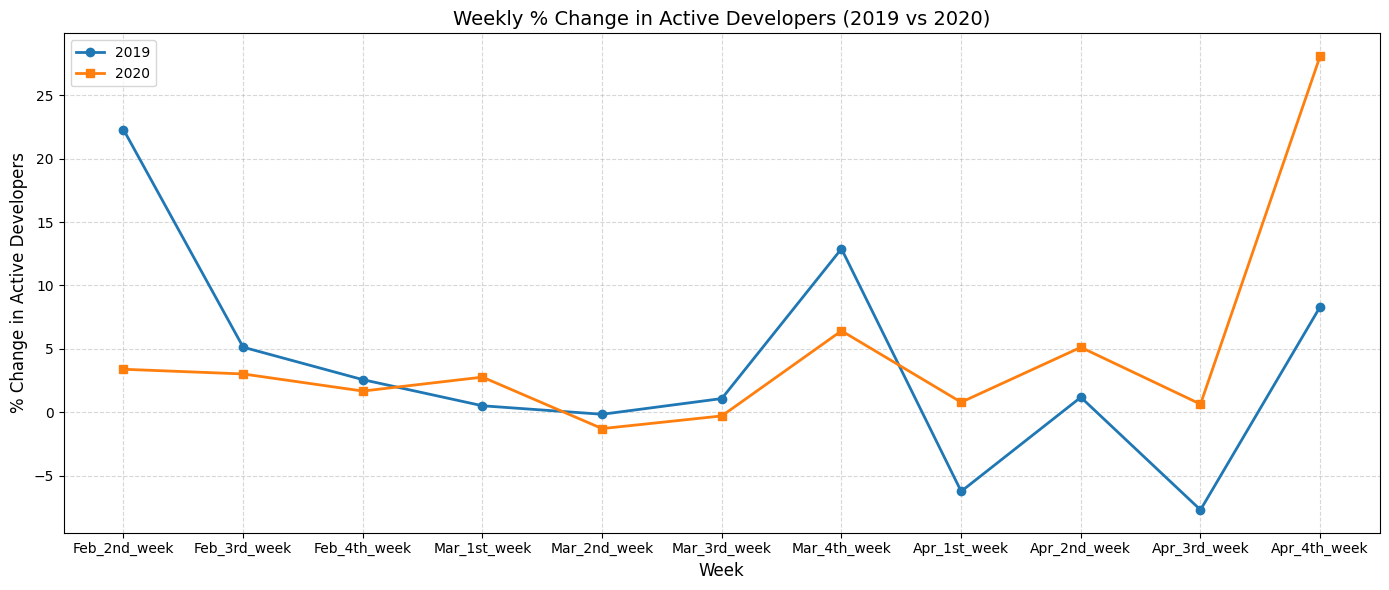

In [ ]:
plt.figure(figsize=(14, 6))

# plotting 2019 active developer % change
plt.plot(combined_pct_change_devs.index, combined_pct_change_devs['active_devs_2019'],
         marker='o', label='2019', linewidth=2)

# plotting 2020 active developer % change
plt.plot(combined_pct_change_devs.index, combined_pct_change_devs['active_devs_2020'],
         marker='s', label='2020', linewidth=2)

plt.title('Weekly % Change in Active Developers (2019 vs 2020)', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('% Change in Active Developers', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

- When looking at the week to week percentage change in active developers, there is a noticeable difference in behavior between 2019 and 2020.  
- In 2019, the early weeks showed stronger fluctuations with a 22% increase in the second week of Febuary, then a steady rise through March with each week having 5%, 2.5% and 12.9% increase in unique developer counts. This followed by some sharp drops in April, including 6.2% and 7.7% drops in 1st and 3rd weeks of April. This indicates bursts of developer activity that later became steady.  
- In contrast, 2020 shows a much steadier pattern early on. The percentage increase in unique developer counts was steady in Febuary, with a small dip in mid March of 1.3% and then a slow buildup through April, peaking in the last week with a significant increase of 28% in acitve developers. This final spike is especially notable, likely shows the impact of global shift to remote work as COVID lockdown began.  
- Overall, the data suggests that developer participation became more stable but increase sharply later in COVID period.